# Polaration in Quantum Chemistry

Quantum chemistry is entering a revolutionary phase, with polariton chemistry emerging as a cutting-edge area of research. Polariton chemistry explores the formation of hybrid light-matter states, known as polaritons, achieved by coupling molecules to optical cavities. These polaritons arise from the strong interaction between molecular excitations and the electromagnetic fields confined within the cavities. This interplay creates new quantum states that blend the properties of light and matter, offering unprecedented control over chemical systems.



One of the most remarkable aspects of polaritons is their ability to alter reaction dynamics. By modifying the potential energy landscapes of molecules, these hybrid states can shift reaction pathways in ways that were once deemed impossible. This ability to reshape chemical processes holds enormous potential for enhancing reaction selectivity, reducing energy barriers, and driving reactions toward desired products with greater efficiency. In doing so, polaritons may unlock opportunities for designing novel catalytic processes and materials.



The role of optical cavities in this domain cannot be understated. By carefully tuning the properties of these cavities, researchers can influence the strength of the light-matter coupling, which in turn determines the characteristics of the resulting polaritons. This precise engineering enables the exploration of complex quantum phenomena, from modifying the vibrational states of molecules to introducing entirely new chemical reactivities. The interplay between cavity modes and molecular excitations offers a new perspective on chemical processes that are deeply rooted in quantum mechanics.



Polariton chemistry is more than a theoretical curiosity; it is a rapidly evolving field with practical implications. From applications in energy-efficient chemical synthesis to advances in molecular photophysics, the study of polaritons has the potential to transform industries. It is particularly exciting to consider how this field can contribute to the development of next-generation materials, where the ability to tune light-matter interactions at the molecular level could lead to breakthroughs in optoelectronics, quantum sensing, and sustainable chemistry.



At the intersection of quantum computing and polariton chemistry lies the opportunity to simulate these systems with unparalleled accuracy. Quantum algorithms, implemented on platforms like Qiskit, allow us to explore the fundamental principles of light-matter coupling in optical cavities. By modeling polariton formation and investigating their impact on reaction dynamics, we can better understand their quantum mechanical properties and harness their potential for real-world applications.



This convergence of light, matter, and quantum computation offers a glimpse into a future where we control chemical reactions with precision and unlock entirely new possibilities. 

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.time_evolvers import TimeEvolutionProblem, TrotterQRTE
from qiskit.primitives import Estimator
from qiskit_aer import AerSimulator
from qiskit_algorithms.time_evolvers import TimeEvolutionResult
import matplotlib.pyplot as plt
from qiskit.visualization import plot_state_city
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define constants
omega_m = 1.0  # Molecular excitation energy (arb. units)
omega_c = 1.0  # Optical cavity mode energy (arb. units)
g = 0.1        # Coupling strength between molecule and cavity
time = 1.0     # Time of evolution

In [3]:
# Define the Pauli operators for a two-qubit system
# Pauli operators act on the molecule (qubit 0) and the cavity (qubit 1)
Z_molecule = SparsePauliOp(["IZ"], [omega_m / 2])  # Molecular excitation
Z_cavity = SparsePauliOp(["ZI"], [omega_c / 2])    # Cavity mode
X_molecule_cavity = SparsePauliOp(["XX"], [g])    # Coupling term (X ⊗ X)
Y_molecule_cavity = SparsePauliOp(["YY"], [g])    # Coupling term (Y ⊗ Y)

In [4]:
# Construct the total Hamiltonian
H_molecule = Z_molecule
H_cavity = Z_cavity
H_interaction = X_molecule_cavity + Y_molecule_cavity
H_total = H_molecule + H_cavity + H_interaction

In [5]:
# Prepare the initial state: ground state of the molecule and cavity
qc = QuantumCircuit(2)  # Two qubits for molecule and cavity
qc.x(0)  # Start with the molecule in |1⟩ and the cavity in |0⟩

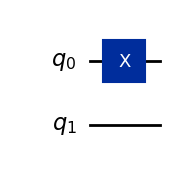

In [6]:
# Visualize the circuit
qc.draw('mpl')

In [7]:
# Set up the Trotterized time evolution method
trotter = TrotterQRTE()  # Trotterized Quantum Real Time Evolution

In [8]:
# Define the time evolution problem
evolution_problem = TimeEvolutionProblem(
    hamiltonian=H_total,
    initial_state=qc,
    time=time
)

In [9]:
# Simulate the time evolution
simulator = AerSimulator()
trotter_result: TimeEvolutionResult = trotter.evolve(evolution_problem)

In [10]:
# Retrieve the statevector from the simulation result
statevector = trotter_result.evolved_state.data

In [11]:
# Calculate the expectation value of the Hamiltonian
estimator = Estimator()
energy = estimator.run(
    circuits=[trotter_result.evolved_state],
    observables=[H_total]
).result().values[0]

In [12]:

# Output the results
print("Evolved Statevector:")
print(statevector)
print("\nExpectation Value of the Hamiltonian:")
print(energy)


Evolved Statevector:
[CircuitInstruction(operation=Instruction(name='circuit-166', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='PauliEvolution', num_qubits=2, num_clbits=0, params=[1.0]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())]

Expectation Value of the Hamiltonian:
0.0
